<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/statistiques_descriptives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving food_consumption.csv to food_consumption.csv


In [ ]:
food_consumption = pd.read_csv('/content/food_consumption.csv')
print(food_consumption.head())

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96


In [ ]:
food_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1430 non-null   int64  
 1   country        1430 non-null   object 
 2   food_category  1430 non-null   object 
 3   consumption    1430 non-null   float64
 4   co2_emission   1430 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 56.0+ KB


In [ ]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [ ]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


When you want to compare summary statistics between groups, it's much easier to use .groupby() and .agg() instead of subsetting and calling the same functions multiple times.

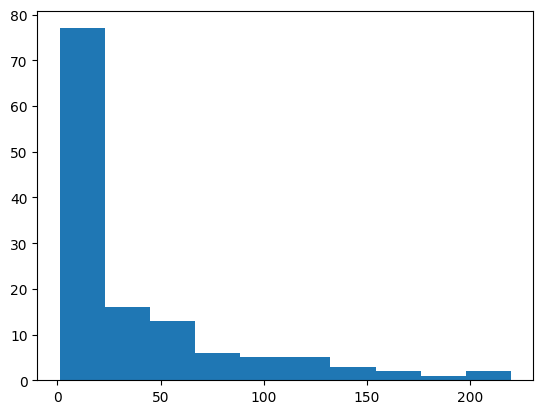

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[(food_consumption['food_category']=='rice')]
rice_consumption
# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [ ]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean,np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


The mean is substantially higher than the median since it's being pulled up by the high values over 100 kg/person/year.

## mesure des quantiles

In [ ]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [ ]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.20,0.40,0.60,0.80,1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [ ]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.10,0.20,0.30,0.4,0.5,0.6,0.7,0.8,0.9,1]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


Those are some high-quality quantiles! While calculating more quantiles gives you a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.

## **Variance et écart-type**

In [ ]:
 # Subtract mean from each data point
dists = food_consumption['co2_emission'] -np.mean(food_consumption['co2_emission'])
print(dists)

0        -37.183993
1        -32.853993
2       1637.616007
3        -19.753993
4        -67.423993
           ...     
1425     -43.173993
1426     -71.053993
1427     145.376007
1428     -74.113993
1429     -73.113993
Name: co2_emission, Length: 1430, dtype: float64


In [ ]:
# Square each distance
sq_dists = dists ** 2
print(sq_dists)

0       1.382649e+03
1       1.079385e+03
2       2.681786e+06
3       3.902202e+02
4       4.545995e+03
            ...     
1425    1.863994e+03
1426    5.048670e+03
1427    2.113418e+04
1428    5.492884e+03
1429    5.345656e+03
Name: co2_emission, Length: 1430, dtype: float64


In [ ]:
#  Sum squared distances
sum_sq_dists = np.sum(sq_dists)
print(sum_sq_dists)

33058448.329499923


In [ ]:
# Divide by number of data points - 1
variance = sum_sq_dists / (1430 - 1)
print(variance)

23133.97363855838


In [ ]:
# Use np.var()
np.var( food_consumption['co2_emission'], ddof=1)

23133.97363855838

Without ddof=1 , population variance is calculated instead of sample variance:

In [ ]:
np.var(food_consumption['co2_emission'])


23117.79603461533

### **standard deviation**

In [ ]:
np.sqrt(np.var(food_consumption['co2_emission'], ddof=1))

152.09856553747764

In [ ]:
np.std(food_consumption['co2_emission'], ddof=1)

152.09856553747764

# Finding outliers with IQR

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower)|(emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


Outstanding outlier detection! It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.